Miguel Gutierrez, Felipez Guzman y Daniel Rambaut

# **Importando librerías**

In [ ]:
#!pip install voila
#!jupyter serverextension enable --sys-prefix voila

In [ ]:
# Instalando librerías necesarias
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 6.7MB/s 
     |████████████████████████████████| 1.2MB 14.6MB/s 
     |████████████████████████████████| 204kB 26.5MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 


In [ ]:
# Librerias generales
import os
from PIL import Image
from pathlib import Path
from os.path import join
import ipywidgets as widgets

# Matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Google
from google.colab import files,drive

# Fastai
import fastbook
fastbook.setup_book()
from fastai.data.all import *
from fastai.vision.all import *

# Librosa
import librosa
import librosa.display

# Sklearn
from sklearn.decomposition import PCA

# Skimage
from skimage import io

In [ ]:
cd gdrive/MyDrive/Kaggle/

/content/gdrive/MyDrive/Kaggle


# **Obteniendo datos**

In [ ]:
# Montando sistema en drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Definiendo variable de entorno y accediendo a la carpeta
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle/"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# Descargando base de datos
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.21G/1.21G [00:16<00:00, 105MB/s] 
100% 1.21G/1.21G [00:16<00:00, 80.7MB/s]


In [ ]:
# Descomprimiendo archivos
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
cd Data

/content/gdrive/My Drive/Kaggle/Data


# **Leyendo Datos**

In [ ]:
DIR_test_clases = "/content/gdrive/MyDrive/Kaggle/Data/images_original" 
nombres_test_clases = os.listdir(DIR_test_clases)
nombres_test_clases

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
dataset_train = []
for idx,clase in enumerate(nombres_test_clases):
  dir_aux = join(DIR_test_clases,clase) + '/'
  nombres_img = os.listdir(dir_aux)
  dataset_img = []
  for nom in nombres_img:
    img = io.imread(join(dir_aux,nom))
    dataset_img.append(img)
  dataset_train.append(dataset_img)

In [ ]:
img = io.imread("/content/gdrive/MyDrive/Kaggle/Data/images_original/blues/blues00000.png")

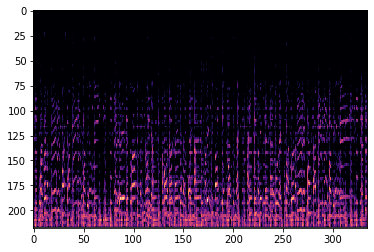

In [ ]:
plt.imshow(img)

Recortamos la imagen

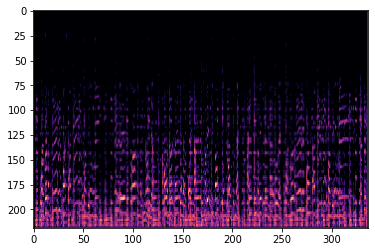

In [ ]:
img_new = img[34:253,53:390,:] #219x337
plt.imshow(img_new)

In [ ]:
img_new.shape

(219, 337, 4)

In [ ]:
cd MyDrive/Kaggle/Data/

[Errno 2] No such file or directory: 'MyDrive/Kaggle/Data/'
/content/gdrive/My Drive/Kaggle/Data


In [ ]:
cd gdrive/Kaggle/Data/

[Errno 2] No such file or directory: 'gdrive/Kaggle/Data/'
/content/gdrive/My Drive/Kaggle/Data


In [ ]:
cd Kaggle/

[Errno 2] No such file or directory: 'Kaggle/'
/content


***
# **Preprocesamiento**
Quitando el borde blanco a las imagenes. Estas casillas no es necesario ejecutarlas ya que las imagenes procesadas están en la carpeta **Data/Data_cut**.

In [ ]:
def getName(n):
    s = str(n)
    return '000'+s if len(s)==2 else '0000'+s

In [ ]:
# Leyendo los datos
blues       = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/blues/blues'+getName(n)+'.png') for n in range(100)]
classical   = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/classical/classical'+getName(n)+'.png') for n in range(100)]
country     = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/country/country'+getName(n)+'.png') for n in range(100)]
disco       = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/disco/disco'+getName(n)+'.png') for n in range(100)] 
hiphop      = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/hiphop/hiphop'+getName(n)+'.png') for n in range(100)] 
jazz        = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/jazz/jazz'+getName(n)+'.png') for n in range(100) if n!=54] 
metal       = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/metal/metal'+getName(n)+'.png') for n in range(100)] 
pop         = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/pop/pop'+getName(n)+'.png') for n in range(100)] 
reggae      = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/reggae/reggae'+getName(n)+'.png') for n in range(100)] 
rock        = [Image.open('/content/gdrive/MyDrive/Kaggle/Data/images_original/rock/rock'+getName(n)+'.png') for n in range(100)] 


In [ ]:
# Guardando imagenes sin borde blanco
for i in range(100):
    blues[i].crop((54,35,389,253)).save('./Data_cut/blues/blues'+getName(i)+'.png')
    classical[i].crop((54,35,389,253)).save('./Data_cut/classical/classical'+getName(i)+'.png')
    country[i].crop((54,35,389,253)).save('./Data_cut/country/country'+getName(i)+'.png')
    disco[i].crop((54,35,389,253)).save('./Data_cut/disco/disco'+getName(i)+'.png')
    hiphop[i].crop((54,35,389,253)).save('./Data_cut/hiphop/hiphop'+getName(i)+'.png')
    jazz[i].crop((54,35,389,253)).save('./Data_cut/jazz/jazz'+getName(i)+'.png')
    metal[i].crop((54,35,389,253)).save('./Data_cut/metal/metal'+getName(i)+'.png')
    pop[i].crop((54,35,389,253)).save('./Data_cut/pop/pop'+getName(i)+'.png')
    reggae[i].crop((54,35,389,253)).save('./Data_cut/reggae/reggae'+getName(i)+'.png')
    rock[i].crop((54,35,389,253)).save('./Data_cut/rock/rock'+getName(i)+'.png')

In [ ]:
# Guardando imagenes sin borde blanco
for i in range(99):
    blues[i].crop((54,35,389,253)).save('./Data_cut/blues/blues'+getName(i)+'.png')
    classical[i].crop((54,35,389,253)).save('./Data_cut/classical/classical'+getName(i)+'.png')
    country[i].crop((54,35,389,253)).save('./Data_cut/country/country'+getName(i)+'.png')
    disco[i].crop((54,35,389,253)).save('./Data_cut/disco/disco'+getName(i)+'.png')
    hiphop[i].crop((54,35,389,253)).save('./Data_cut/hiphop/hiphop'+getName(i)+'.png')
    if i!=54: jazz[i].crop((54,35,389,253)).save('./Data_cut/jazz/jazz'+getName(i)+'.png') 
    metal[i].crop((54,35,389,253)).save('./Data_cut/metal/metal'+getName(i)+'.png')
    pop[i].crop((54,35,389,253)).save('./Data_cut/pop/pop'+getName(i)+'.png')
    reggae[i].crop((54,35,389,253)).save('./Data_cut/reggae/reggae'+getName(i)+'.png')
    rock[i].crop((54,35,389,253)).save('./Data_cut/rock/rock'+getName(i)+'.png')

***
# **Definiendo Red**

In [ ]:
# Buenos resultados
mnist = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items=get_image_files,
                  splitter = RandomSplitter(),
                  batch_tfms=Normalize(), 
                  item_tfms=RandTransform(p=0.4),
                  get_y=parent_label)

In [ ]:
# Cargando datablock
dls = mnist.dataloaders("./Data/Data_cut")

In [ ]:
# Generos musicales (etiquetas del modelo)
dls.vocab

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

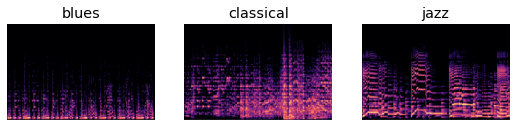

In [ ]:
# Observando algunas imagenes
dls.show_batch(max_n=3)
plt.grid(True,which='both')

### **Modelo ResNet_34**

In [ ]:
# Entrenando
learn_34 = cnn_learner(dls, resnet34, metrics=accuracy)
learn_34.fine_tune(7)

epoch,train_loss,valid_loss,accuracy,time
0,2.986962,1.753283,0.380000,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.682787,1.134256,0.635000,00:10
1,1.164926,1.017968,0.685000,00:10
2,0.816486,0.943562,0.715000,00:10
3,0.588312,0.893939,0.710000,00:10
4,0.432010,0.956447,0.715000,00:10
5,0.328446,0.938848,0.720000,00:10
6,0.257631,0.933115,0.745000,00:10


In [ ]:
# Guardando modelo
learn_34.save(file='./modelo_resnet34')

Path('models/modelo_resnet34.pth')

### **Modelo ResNet_18**

In [ ]:
# Entrenando
learn_18 = cnn_learner(dls, resnet18, metrics=accuracy)
learn_18.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.079058,1.884312,0.400000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.667605,1.437626,0.570000,00:06
1,1.170246,1.241421,0.595000,00:06
2,0.839914,1.188485,0.605000,00:06
3,0.627804,1.134292,0.620000,00:06


In [ ]:
# Guardando modelo
learn_18.save(file='./modelo_resnet18')

Path('models/modelo_resnet18.pth')

### **Modelo ResNet_50**

In [ ]:
# Entrenando
learn_50 = cnn_learner(dls, resnet50, metrics=accuracy)
learn_50.bs = 32
learn_50.fine_tune(7)

epoch,train_loss,valid_loss,accuracy,time
0,2.488932,1.724317,0.475000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.988542,1.256212,0.590000,00:17
1,0.658934,1.260671,0.600000,00:16
2,0.450509,1.153276,0.695000,00:16
3,0.325474,1.106065,0.695000,00:16
4,0.242385,1.117597,0.705000,00:16
5,0.183649,1.115768,0.685000,00:16
6,0.144097,1.107172,0.690000,00:16


In [ ]:
# Guardando modelo
learn_50.save(file='./modelo_resnet50')

Path('models/modelo_resnet50.pth')

Dado que el mejor resultado de accuracy se logra con el modelo de la resnet34 se continuará realizando el análisis con esta arquitectura.

In [ ]:
# Cargando modelo
learn = learn.load('./modelo_resnet34')

### **Arquitectura de la Red**

In [ ]:
learn.summary()

In [ ]:
# Capas de la red
learn.model

***
# **PCA**

In [ ]:
# Ultima capa de la red
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=10, bias=False)
)

In [ ]:
# Tomando funcion lineal de la utlima capa
learn.model[1][8].weight.shape

torch.Size([10, 512])

In [ ]:
# Pesos de la funcion lineal de la utlima capa
learn.model[1][8].weight

Parameter containing:
tensor([[-0.0897, -0.0468,  0.0952,  ...,  0.0326, -0.0500, -0.0527],
        [ 0.0801,  0.0045, -0.0831,  ...,  0.1668, -0.0727, -0.0850],
        [-0.0474, -0.0047,  0.0151,  ..., -0.0584,  0.0310, -0.0027],
        ...,
        [ 0.1315,  0.1054,  0.0170,  ..., -0.0017,  0.0729, -0.0457],
        [ 0.0113,  0.0115, -0.0560,  ...,  0.0425,  0.0314,  0.0073],
        [-0.0448,  0.0680,  0.0735,  ..., -0.1038, -0.0828,  0.0913]], device='cuda:0', requires_grad=True)

In [ ]:
# Pasando matriz de pesos a numpy.array
M = learn.model[1][8].weight.cpu().detach().numpy()

Ahora con la matriz de pesos se puede aplicar PCA para graficar el mapa de dispersión. Para esto se tomaran solo 3 componentes principales las cuales logran explicar aproximadamente un 35% de la varianza.

In [ ]:
# Aplicando PCA
pca = PCA(n_components=3)
pca.fit(M.T);

In [ ]:
# Varianza explicada
sum(pca.explained_variance_ratio_)

0.36212409287691116

In [ ]:
# Pasando a Data Frame
data = pd.DataFrame(pca.components_,columns=dls.vocab)
data

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,-0.185114,-0.250554,0.442038,0.259115,-0.056493,0.361908,0.089055,-0.109787,-0.061947,0.694570
1,0.678126,0.332197,-0.125305,-0.178481,-0.274280,0.235190,-0.211205,-0.361197,-0.080460,0.264852
2,-0.284059,0.509212,-0.243966,0.262798,-0.242727,0.394667,0.456707,0.026653,-0.295978,-0.140918


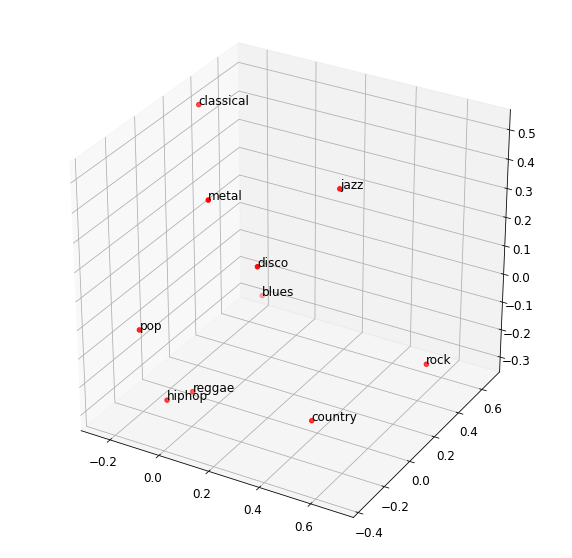

In [ ]:
# Graficando las componentes de PCA
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

labels = dls.vocab

# componentes de PCA
xdata = pca.components_[0,:]    
ydata = pca.components_[1,:]    
zdata = pca.components_[2,:]    

ax.scatter3D(xdata, ydata, zdata,color='r')

for label in range(10):
    ax.text(xdata[label],ydata[label],zdata[label],labels[label])

***
# **Interfaz**

Para realizar la prediccioón de nuevas imagenes se definió una función classify la cual dada lee un archivo leido por la interfaz, procesa la imagen y utiliza el modelo pre-entrenado para predecir los resultados.

In [ ]:
def classify(change):
    # Leyendo archivo
    y, sr = librosa.load('./cache/example.wav')
    whale_song, _ = librosa.effects.trim(y)

    # Calculando espectrograma
    n_fft = 2048
    hop_length = 512
    D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
    D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)

    # Guardando espectrograma como una imagen
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(DB, ax=ax)
    fig.savefig('./cache/spec.png')

    # Leyendo y recortando imagen (bordes blancos)
    img = io.imread("./cache/spec.png")
    img_new = img[92:702,145:1083,:] #219x337
    img_new= Image.fromarray(img_new)
    img_new = img_new.resize((337,219))
    img_new.save('./cache/spec2.png')

    # Leyendo imagen y prediciendo genero musical
    img = io.imread("./cache/spec2.png")
    pred,pred_idx,probs = learn.predict(img[:,:,:3])

    # Imprimiendo resultado
    lbl_pred = widgets.Label()
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    print(lbl_pred)

In [ ]:
# Definiendo boton para realizar la prediccion
btn_run = widgets.Button(description='Classify')
btn_run
btn_run.on_click(classify)

### **Realizando predicción:**
Para realizar la predicción se puede ejecutar esta celda, la cual le permitirá a un usuario ingresar un audio (**con formato .wav**) para predecir cuál es el género musical. El audio ingresado puede ser de cualquier duración (entre más largo se demora más en subir), sin embargo, ya que el modelo fué entrenado con pistas de audio de 30 segundos, los mejores resultados se obtienen con archivos que tengan una longitud similar. Si estos archivos no duran 30 segundos, el programa aplica un resize al espectrograma obtenido, lo cual genera confusiones al modelo y por lo tanto, malos resultados. Para ver más en detalle qué está haciendo la función classify más adelante en notebook se puede observar el pipeline.

In [ ]:
# Definiendo interfaz para subir archivos de audio y aplicar la prediccion
uploaded = files.upload()
dst ='./cache/example.wav' 
out_pl = widgets.Output()
os.rename(list(uploaded.keys())[0], dst)
display(btn_run)

Saving blues.00016.wav to blues.00016.wav


Button(description='Classify', style=ButtonStyle())

Label(value='Prediction: jazz; Probability: 0.9192')


In [ ]:
#!pip install voila
#!jupyter serverextension enable --sys-prefix voila

***
# **Pipeline Clasificacion**

A continucación mostramos el paso a paso de lo que está haciendo la función classify con los nuevos audios.

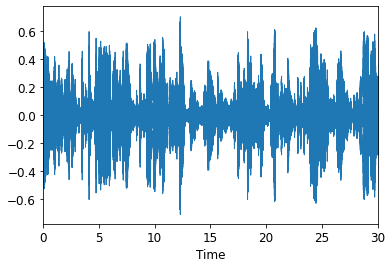

In [ ]:
# Mostrando onda
y, sr = librosa.load('./cache/example.wav')
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

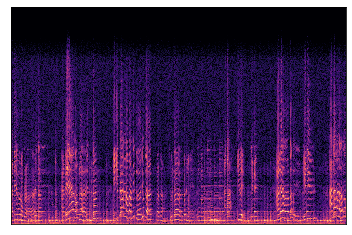

In [ ]:
# Calculando spectrograma
n_fft = 2048
hop_length = 512
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(DB, ax=ax)

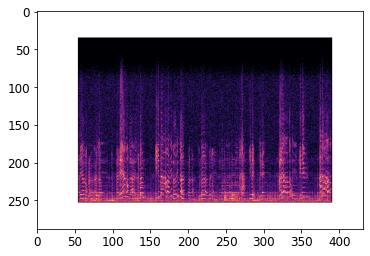

In [ ]:
# Guardando archivo como una imagen
fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.imshow(image_from_plot)

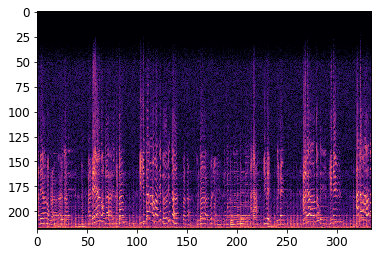

In [ ]:
# Quitando borde blanco
image_from_plot = Image.fromarray(np.uint8(image_from_plot)).convert('RGB')
image_from_plot = image_from_plot.crop((54,35,389,253))
plt.imshow(image_from_plot)

In [ ]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(DB, ax=ax)
fig.savefig('./cache/spec.png')

In [ ]:
img = io.imread("./cache/spec.png")

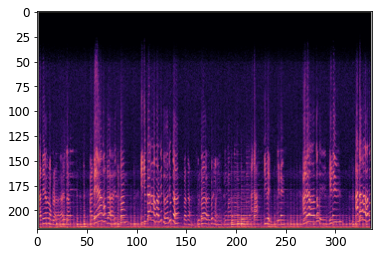

In [ ]:
img_new = img[92:702,145:1083,:] #219x337
#img_new= np.resize(img_new,(219, 337, 4))
img_new= Image.fromarray(img_new)
img_new = img_new.resize((337,219))
img_new.save('./cache/spec2.png')
plt.imshow(img_new)

In [ ]:
img = io.imread("./cache/spec2.png")

In [ ]:
pred,pred_idx,probs = learn.predict(img[:,:,:3])

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: jazz; Probability: 0.9192')

-----------------------------------------------